# Real Estate Market Analysis in El Salvador: Data Insights and Predictive Modeling

## Introduction

This project aims to analyze real estate data from El Salvador to uncover insights and trends in the housing market. The dataset, obtained through web scraping, contains detailed information on properties for sale, including their location, price, size, and various attributes like the number of bedrooms, bathrooms, and parking spaces.

## Objectives

1. **Data Cleaning and Preparation**: Ensure the dataset is clean, complete, and ready for analysis.
2. **Exploratory Data Analysis (EDA)**: Understand the distribution and relationships within the data through statistical analysis and visualizations.
3. **Geospatial Analysis**: Utilize mapping tools to visualize property locations and identify geographic trends.
4. **Predictive Modeling**: Build machine learning models to predict property prices based on their features.
5. **Interactive Dashboard**: Create an interactive dashboard using Dash to allow users to explore the data and insights dynamically.

### Tools and Libraries

The project utilizes various Python libraries for data manipulation, visualization, mapping, and machine learning, including:
- `pandas` and `numpy` for data manipulation and analysis.
- `matplotlib` and `seaborn` for data visualization.
- `folium` and `googlemaps` for geospatial analysis.
- `scikit-learn` for building and evaluating machine learning models.
- `joblib` for saving and loading models.

By the end of this project, we aim to provide a comprehensive analysis of the real estate market in El Salvador, offering valuable insights for potential buyers, sellers, and investors.

In [72]:
# Data Manipulation and Analysis
import pandas as pd    # For data manipulation and analysis
import numpy as np     # For mathematical operations and array handling
import json            # For working with JSON data
import time            # For time-related functions

# Visualization
import matplotlib.pyplot as plt  # For creating plots and visualizations
import seaborn as sns            # For statistical data visualization

# Maps and Geolocation
import folium                   # For creating interactive maps
import branca.colormap as cm    # For creating color maps in Folium
from folium.plugins import HeatMap, MarkerCluster  # For adding heatmaps and marker clusters to Folium maps
import googlemaps               # For working with the Google Maps API

# Modeling and Machine Learning
from sklearn.cluster import KMeans                        # For clustering
from sklearn.linear_model import LinearRegression         # For linear regression
from sklearn.tree import DecisionTreeRegressor            # For decision tree regression
from sklearn.ensemble import RandomForestRegressor        # For random forest regression
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score, train_test_split  # For cross-validation and hyperparameter tuning
from sklearn.metrics import mean_squared_error, r2_score  # For calculating performance metrics

# Saving and Loading Models
import joblib  # For serializing and deserializing Python objects (such as trained models)

# Geometry and Shape Manipulation
from shapely.geometry import shape  # For working with geometric shapes

In [2]:
df = pd.read_csv(r"cleaned_data_final.csv")

In [3]:
df.head()

,location,title,short_description,price,square_meters,bedrooms,parking,bathroom
0,nuevo cuscatlán,"apartamento en venta en torre artea, nuevo cu...",encuentra en propi +500 casas y apartamentos e...,295000,121.000000,3.0,2.0,2.0
1,san salvador,"apartamento en venta en puerta villa urbana, ...","agenda visita, oferta y venta en propi. precio...",210000,102.674699,2.0,2.0,2.0
2,santa tecla,"ubicada en la prestigiosa colonia utila, de l...","ubicada en la prestigiosa colonia utila, de la...",699999,550.000000,4.0,2.0,3.0
3,nuevo cuscatlán,"residencial condado norte, nuevo cuscatlan, c...",¡bienvenidos a residencial condado norte! ubic...,400000,180.000000,4.0,3.0,3.0
4,san salvador,vendo casa residencial la florida nuevo cusca...,casa moderna de 3 niveles con preciosa vista...,570000,1200.000000,5.0,5.0,6.0


## Descriptive and Exploratory Data Analysis (EDA)

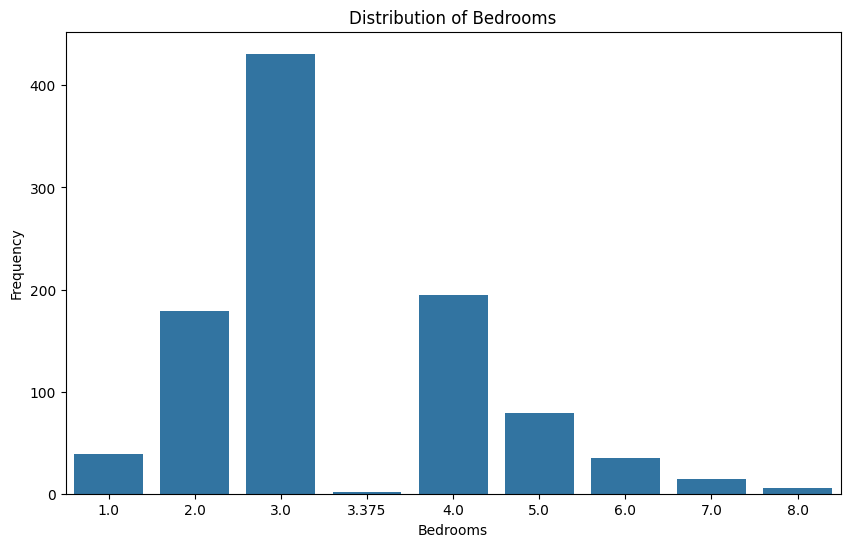

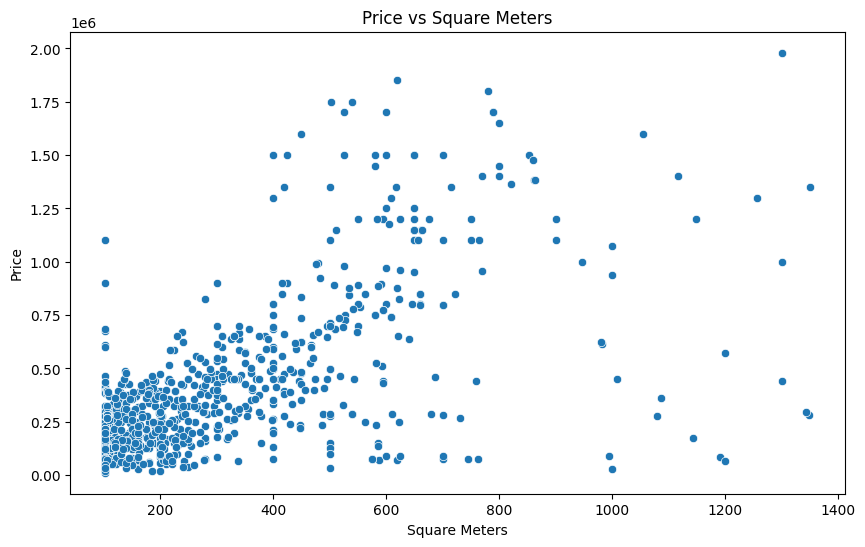

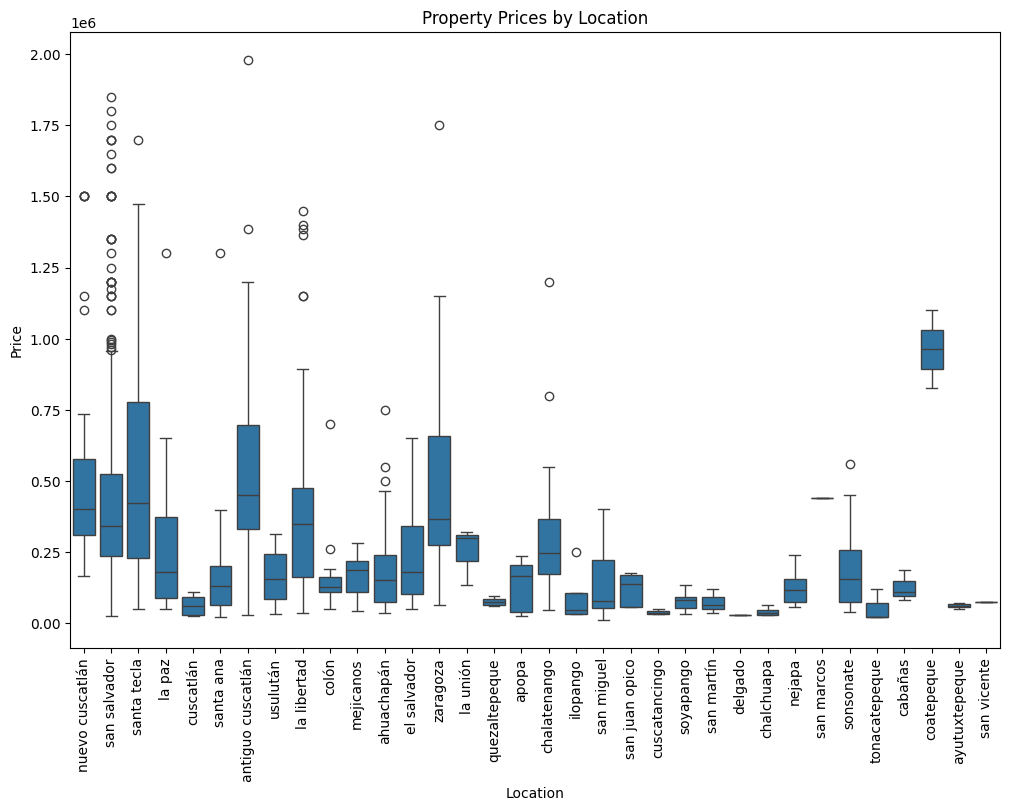

In [4]:
# Distribution of Bedrooms
plt.figure(figsize=(10, 6))
sns.countplot(x='bedrooms', data=df)
plt.title('Distribution of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Frequency')
plt.show()

# Scatter Plot of Price vs Square Meters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='square_meters', y='price', data=df)
plt.title('Price vs Square Meters')
plt.xlabel('Square Meters')
plt.ylabel('Price')
plt.show()

# Boxplot of Prices by Location
plt.figure(figsize=(12, 8))
sns.boxplot(x='location', y='price', data=df)
plt.title('Property Prices by Location')
plt.xticks(rotation=90)
plt.xlabel('Location')
plt.ylabel('Price')
plt.show()

## Interpretation

**1. Distribution of Bedrooms:**
  - The majority of properties have 3 bedrooms, followed by properties with 2 and 4 bedrooms.
  - There are some properties with more than 5 bedrooms, which could indicate larger or luxury properties.

**2. Relationship between Price and Square Meters**
  - There is a positive relationship between price and square meters, which is expected as larger properties tend to be more expensive.
  - However, there are some properties that do not follow this trend, which might be interesting to investigate further.

**3. Property Prices by Location**
  - The variation in property prices by location is significant.
  - Locations like Nuevo Cuscatlán and San Salvador show greater dispersion in prices, indicating a mix of properties in different price ranges.
  - Locations like Cojutepeque and San Vicente show more consistent and lower price ranges.

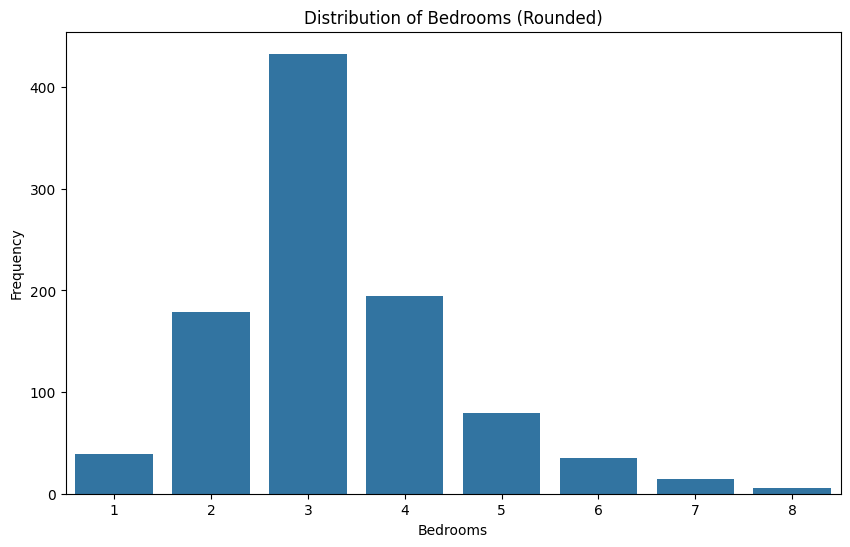

In [5]:
# Round the values of bedrooms, parking, and bathroom to the nearest integer
df['bedrooms'] = df['bedrooms'].round().astype(int)
df['parking'] = df['parking'].round().astype(int)
df['bathroom'] = df['bathroom'].round().astype(int)

# Review the distribution of bedrooms again
plt.figure(figsize=(10, 6))
sns.countplot(x='bedrooms', data=df)
plt.title('Distribution of Bedrooms (Rounded)')
plt.xlabel('Bedrooms')
plt.ylabel('Frequency')
plt.show()

## Clusters

In [6]:
# Select features for clustering
X = df[['square_meters', 'bedrooms', 'bathroom', 'parking']]

In [7]:
# Create and train the clustering model
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

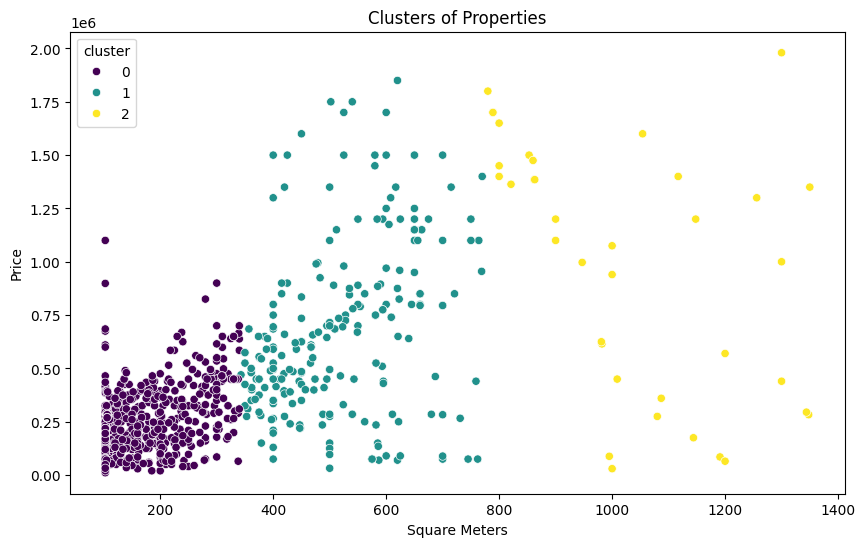

In [8]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='square_meters', y='price', hue='cluster', data=df, palette='viridis')
plt.title('Clusters of Properties')
plt.xlabel('Square Meters')
plt.ylabel('Price')
#plt.savefig('Clusters_of_Properties.png')
plt.show()

### Initial Insights:
1. **Cluster 0 (Purple):**
   - Predominantly properties with less than 400 square meters.
   - Price mostly below $500,000.
   - This group could represent smaller and more affordable properties.

2. **Cluster 1 (Green):**
   - Properties with a wider range of square meters (between 200 and 800).
   - Price also in a wider range, generally below $1,000,000.
   - Could represent medium-sized and mid-range properties.

3. **Cluster 2 (Yellow):**
   - Properties with more than 800 square meters.
   - High prices, generally above $1,000,000.
   - This group seems to represent luxury and larger properties.

In [9]:
# Group by clusters and calculate descriptive statistics
cluster_stats = df.groupby('cluster').agg({
    'price': ['mean', 'median', 'min', 'max', 'std'],
    'square_meters': ['mean', 'median', 'min', 'max', 'std'],
    'bedrooms': ['mean', 'median', 'min', 'max', 'std'],
    'parking': ['mean', 'median', 'min', 'max', 'std'],
    'bathroom': ['mean', 'median', 'min', 'max', 'std']
}).reset_index()

print(cluster_stats)

  cluster          price                                            \
                    mean     median    min      max            std   
0       0  241692.633523   225000.0  11000  1100000  157560.017902   
1       1  670509.518828   620000.0  32000  1850000  399319.390631   
2       2  981247.486486  1100000.0  30000  1980000  584264.455862   

  square_meters                              ...   parking                 \
           mean  median         min     max  ...      mean median min max   
0    165.728317   136.5  102.674699   340.0  ...  2.254261    2.0   1   8   
1    515.004184   500.0  343.000000   770.0  ...  4.263598    4.0   1  10   
2   1031.081081  1000.0  780.000000  1350.0  ...  5.540541    5.0   1  10   

             bathroom                           
        std      mean median min max       std  
0  1.173127  2.264205    2.0   1   7  1.066000  
1  2.221357  3.832636    4.0   1   7  1.513671  
2  2.566825  4.162162    5.0   1   7  1.691704  

[3 rows x 26 colu

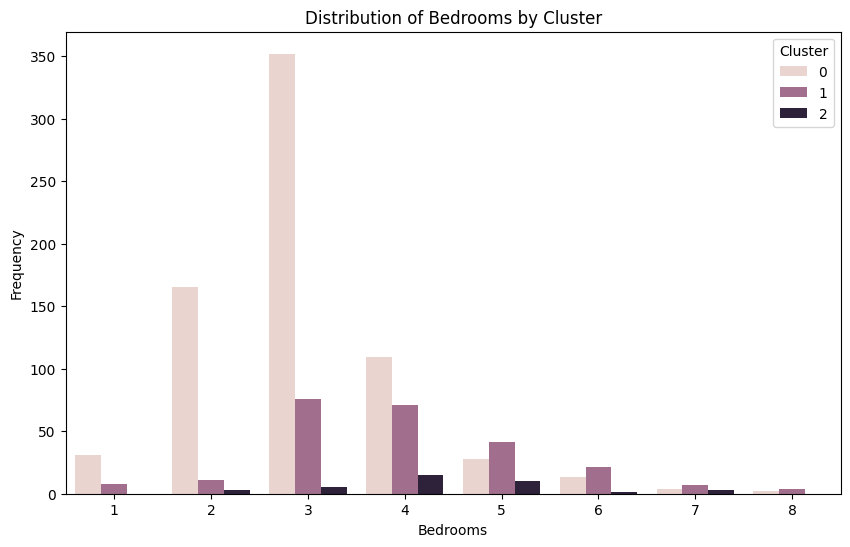

In [10]:
# Visualize the distribution of bedrooms by cluster
plt.figure(figsize=(10, 6))
sns.countplot(x='bedrooms', hue='cluster', data=df)
plt.title('Distribution of Bedrooms by Cluster')
plt.xlabel('Bedrooms')
plt.ylabel('Frequency')
plt.legend(title='Cluster')
plt.show()

### Analysis of the Distribution of Bedrooms by Cluster:
1. **Cluster 0 (Light Purple):**
   - Dominated by properties with 2 and 3 bedrooms.
   - This cluster appears to represent smaller and more affordable properties, as we had assumed.

2. **Cluster 1 (Purple):**
   - Shows a more even distribution among properties with 2, 3, 4, and 5 bedrooms.
   - This cluster might represent medium-sized and mid-range properties.

3. **Cluster 2 (Dark Purple):**
   - Includes properties with a higher number of bedrooms, especially 4 and 5.
   - Represents larger and possibly luxury properties.

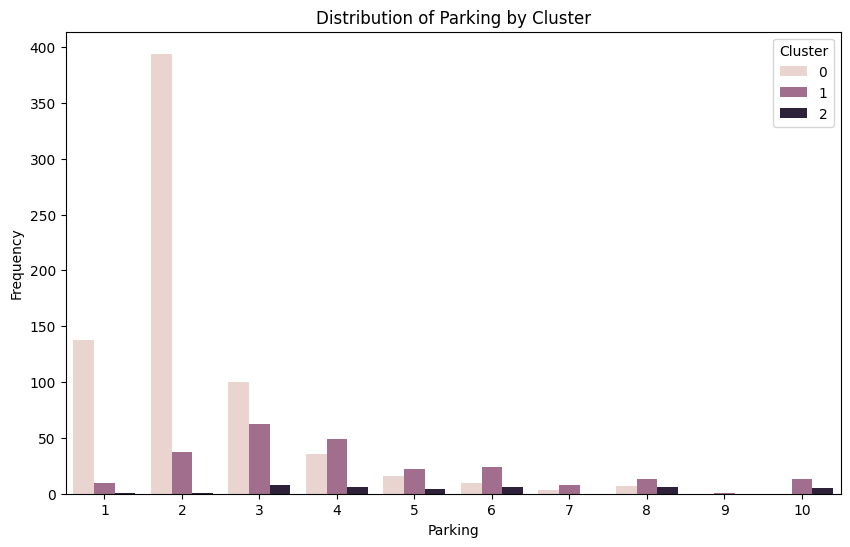

In [11]:
#Visualize the distribution of parking by cluster
plt.figure(figsize=(10, 6))
sns.countplot(x='parking', hue='cluster', data=df)
plt.title('Distribution of Parking by Cluster')
plt.xlabel('Parking')
plt.ylabel('Frequency')
plt.legend(title='Cluster')
plt.show()

### Analysis of the Distribution of Parking by Cluster

1. **Cluster 0 (Light Purple):**
   - Dominated by properties with 2 parking spaces.
   - There is also a significant number of properties with 1 parking space.
   - This cluster likely represents smaller and more affordable properties, as the number of parking spaces is limited.

2. **Cluster 1 (Purple):**
   - Shows a more varied distribution of parking spaces.
   - Properties with 2 and 3 parking spaces are common.
   - There is a notable presence of properties with more than 4 parking spaces.
   - This cluster represents medium-sized and mid-range properties, with greater flexibility in the number of parking spaces.

3. **Cluster 2 (Dark Purple):**
   - Includes properties with a higher number of parking spaces.
   - Properties with more than 4 parking spaces are common.
   - Represents larger and possibly luxury properties, with a significantly higher number of parking spaces.

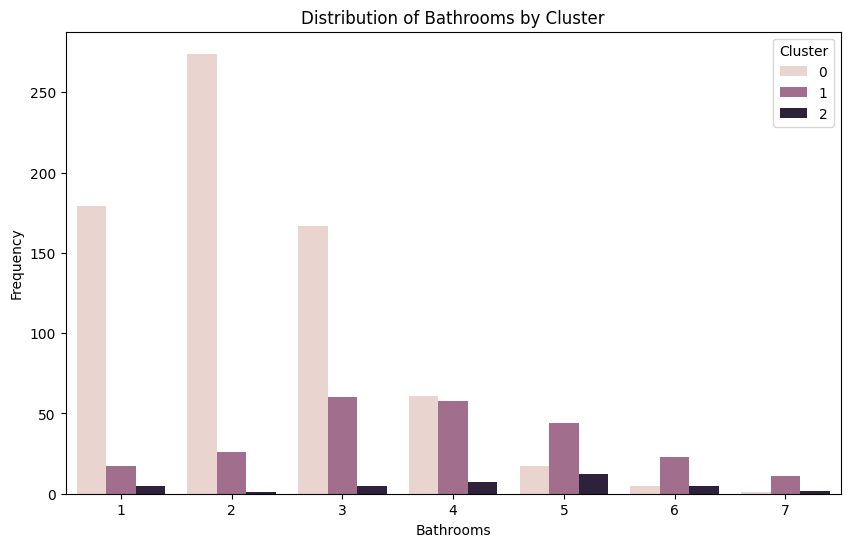

In [12]:
# Visualize the distribution of bathrooms by cluster
plt.figure(figsize=(10, 6))
sns.countplot(x='bathroom', hue='cluster', data=df)
plt.title('Distribution of Bathrooms by Cluster')
plt.xlabel('Bathrooms')
plt.ylabel('Frequency')
plt.legend(title='Cluster')
plt.show()

### Analysis of the Distribution of Bathrooms by Cluster

1. **Cluster 0 (Light Purple):**
   - Predominantly properties with 1 or 2 bathrooms.
   - This cluster represents smaller and more affordable properties.

2. **Cluster 1 (Purple):**
   - Shows a more varied distribution of bathrooms, with a notable peak at 3 bathrooms.
   - Properties with 2, 3, and 4 bathrooms are common, indicating a mid-range in terms of size and price.

3. **Cluster 2 (Dark Purple):**
   - Includes properties with a higher number of bathrooms, especially 4, 5, and more bathrooms.
   - Represents larger and luxury properties, with a higher number of bathrooms.

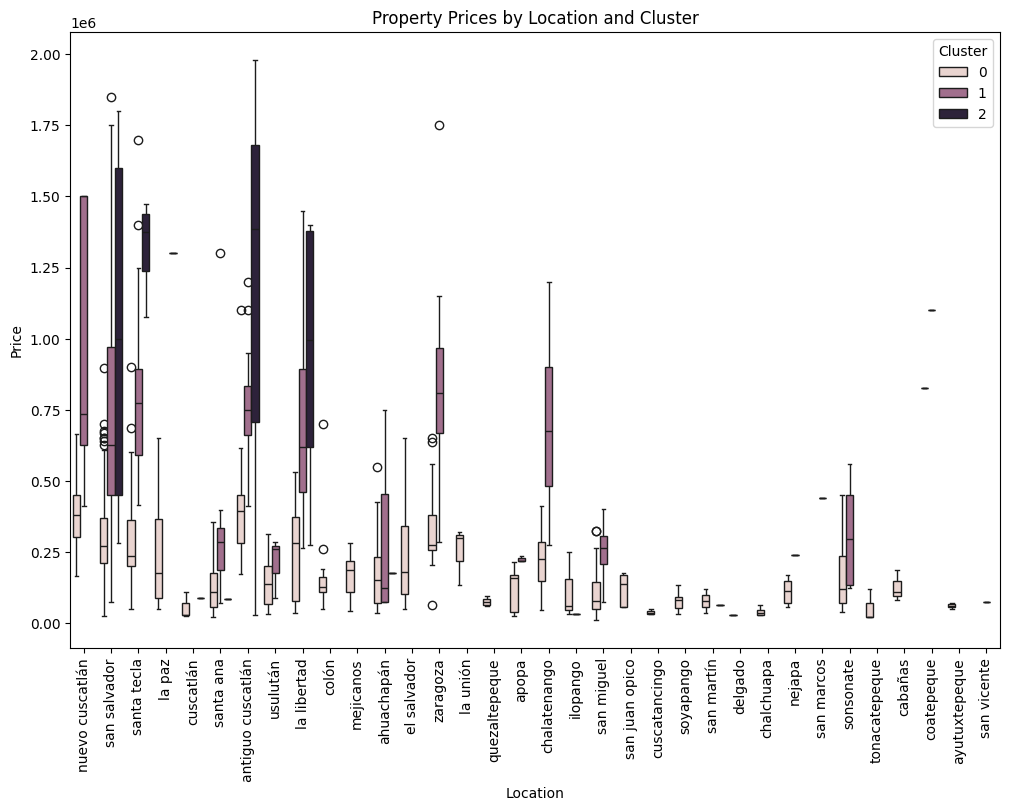

In [13]:
#Visualize the distribution of clusters by location
plt.figure(figsize=(12, 8))
sns.boxplot(x='location', y='price', hue='cluster', data=df)
plt.title('Property Prices by Location and Cluster')
plt.xticks(rotation=90)
plt.xlabel('Location')
plt.ylabel('Price')
plt.legend(title='Cluster')
plt.show()

### Analysis of Property Prices by Location and Cluster

1. **Locations with High Prices:**
   - `nuevo cuscatlán`, `san salvador`, and `antiguo cuscatlán` have properties in all clusters, but especially stand out in Cluster 2 (Purple) with higher-priced properties.
   - These locations have a wide dispersion of prices, reflecting the presence of luxury properties.

2. **Locations with Medium Prices:**
   - `santa tecla` and `la libertad` show properties mainly in Cluster 1 (Pink) and Cluster 0 (Beige), with considerable variability in prices.
   - These locations represent a mid-range of properties in terms of size and price.

3. **Locations with Low Prices:**
   - `cojutepeque`, `chalatenango`, and `san miguel` predominantly have properties in Cluster 0 (Beige), with lower prices and less variability.
   - These locations tend to have more affordable and smaller properties.

### General Conclusions:
- **Cluster 0 (Light Purple):** Smaller and more affordable properties, concentrated in locations with lower prices.
- **Cluster 1 (Purple):** Medium-sized and mid-priced properties, with a good variety in terms of bathrooms and parking spaces.
- **Cluster 2 (Dark Purple):** Larger and luxury properties, concentrated in locations with higher prices and a greater number of bathrooms and parking spaces.

## Geospatial Analysis of Clusters

In [14]:
df.location.unique()

array(['nuevo cuscatlán', 'san salvador', 'santa tecla', 'la paz',
       'cuscatlán', 'santa ana', 'antiguo cuscatlán', 'usulután',
       'la libertad', 'colón', 'mejicanos', 'ahuachapán', 'el salvador',
       'zaragoza', 'la unión', 'quezaltepeque', 'apopa', 'chalatenango',
       'ilopango', 'san miguel', 'san juan opico', 'cuscatancingo',
       'soyapango', 'san martín', 'delgado', 'chalchuapa', 'nejapa',
       'san marcos', 'sonsonate', 'tonacatepeque', 'cabañas',
       'coatepeque', 'ayutuxtepeque', 'san vicente'], dtype=object)

In [15]:
# Replace 'YOUR_API_KEY' with your Google Maps API key
gmaps = googlemaps.Client(key='YOUR_API_KEY')

In [16]:
# List of locations
locations = [
    'nuevo cuscatlán', 'san salvador', 'santa tecla', 'la paz',
    'cuscatlán', 'santa ana', 'antiguo cuscatlán', 'usulután',
    'la libertad', 'colón', 'mejicanos', 'ahuachapán', 'el salvador',
    'zaragoza', 'la unión', 'quezaltepeque', 'apopa', 'chalatenango',
    'ilopango', 'san miguel', 'san juan opico', 'cuscatancingo',
    'soyapango', 'san martín', 'delgado', 'chalchuapa', 'nejapa',
    'san marcos', 'sonsonate', 'tonacatepeque', 'cabañas',
    'coatepeque', 'ayutuxtepeque', 'san vicente'
]

In [17]:
# Function to get latitude and longitude
def get_lat_long(location):
    try:
        geocode_result = gmaps.geocode(location + ", El Salvador")
        if geocode_result:
            lat = geocode_result[0]['geometry']['location']['lat']
            lng = geocode_result[0]['geometry']['location']['lng']
            return (lat, lng)
        else:
            print(f"Geocoding failed for location: {location}")
            return (None, None)
    except Exception as e:
        print(f"Error occurred for location: {location}. Error: {e}")
        return (None, None)

# Create a DataFrame of locations
df_locations = pd.DataFrame(locations, columns=['location'])

# Get latitude and longitude for each location with a delay between requests
latitudes = []
longitudes = []

for location in df_locations['location']:
    lat, lon = get_lat_long(location)
    latitudes.append(lat)
    longitudes.append(lon)
    time.sleep(1)  # Wait 1 second between requests

# Add coordinates to the DataFrame
df_locations['latitude'] = latitudes
df_locations['longitude'] = longitudes

# View the results
print(df_locations)

             location   latitude  longitude
0     nuevo cuscatlán  13.649671 -89.268102
1        san salvador  13.692940 -89.218191
2         santa tecla  13.675784 -89.289473
3              la paz  13.495364 -88.979678
4           cuscatlán  13.866196 -89.056153
5           santa ana  13.977828 -89.563912
6   antiguo cuscatlán  13.664094 -89.251472
7            usulután  13.345311 -88.442811
8         la libertad  13.681766 -89.360630
9               colón  13.707793 -89.348779
10          mejicanos  13.734471 -89.217929
11         ahuachapán  13.925949 -89.841138
12        el salvador  13.794185 -88.896530
13           zaragoza  13.586081 -89.291847
14           la unión  13.332346 -87.850064
15      quezaltepeque  13.826345 -89.270477
16              apopa  13.802824 -89.179845
17       chalatenango  14.041196 -88.939518
18           ilopango  13.699280 -89.105744
19         san miguel  13.479292 -88.177918
20     san juan opico  13.875866 -89.358260
21      cuscatancingo  13.756542

In [18]:
# Save the coordinates to a CSV file for later use
#df_locations.to_csv('locations_coordinates.csv', index=False)

In [19]:
# Read the coordinates from the CSV file
df_coordinates = pd.read_csv(r"locations_coordinates.csv")

In [20]:
# Merge the coordinates with the original DataFrame
df = df.merge(df_coordinates, on='location', how='left')

# Verify the merge
print(df.head())

          location                                              title  \
0  nuevo cuscatlán   apartamento en venta en torre artea, nuevo cu...   
1     san salvador   apartamento en venta en puerta villa urbana, ...   
2      santa tecla   ubicada en la prestigiosa colonia utila, de l...   
3  nuevo cuscatlán   residencial condado norte, nuevo cuscatlan, c...   
4     san salvador   vendo casa residencial la florida nuevo cusca...   

                                   short_description   price  square_meters  \
0  encuentra en propi +500 casas y apartamentos e...  295000     121.000000   
1  agenda visita, oferta y venta en propi. precio...  210000     102.674699   
2  ubicada en la prestigiosa colonia utila, de la...  699999     550.000000   
3  ¡bienvenidos a residencial condado norte! ubic...  400000     180.000000   
4    casa moderna de 3 niveles con preciosa vista...  570000    1200.000000   

   bedrooms  parking  bathroom  cluster   latitude  longitude  
0         3        2  

In [21]:
# Save the updated DataFrame with coordinates
#df.to_csv('house_data_with_coordinates.csv', index=False)

In [22]:
# Create a map centered on El Salvador
m = folium.Map(location=[13.794185, -88.89653], zoom_start=8)

# Define colors for the clusters
colors = ['purple', 'green', 'yellow']

#Add markers for each property based on the cluster
for idx, row in df.iterrows():
    if pd.notna(row['latitude']) and pd.notna(row['longitude']):
        folium.CircleMarker(
            location=[row['latitude'], row['longitude']],
            radius=5,
            color=colors[row['cluster']],
            fill=True,
            fill_color=colors[row['cluster']],
            fill_opacity=0.7,
            popup=row['title']
        ).add_to(m)

# Save the map to an HTML file
#m.save('property_clusters_map.html')

### Analysis of the Geospatial Distribution of Clusters

1. **Cluster 0 (Purple):**
   - Spread throughout the country, with a high concentration in the central region around San Salvador and its surroundings.
   - Represents smaller and more affordable properties.

2. **Cluster 1 (Green):**
   - Appears in various locations but less frequently.
   - Concentrated in specific areas, indicating medium-sized and mid-priced properties.

3. **Cluster 2 (Yellow):**
   - Present in some locations but not as dispersed as Cluster 0.
   - Represents larger and luxury properties.

### Key Insights:

- **San Salvador and its surroundings:** The region has a high concentration of properties from all clusters, indicating a wide range of properties from affordable to luxury.
- **Other regions:** The distribution of clusters in other parts of the country shows a mix of properties, but with a greater representation of more affordable properties (Cluster 0).

In [23]:
# Create a map centered on El Salvador
m = folium.Map(location=[13.794185, -88.89653], zoom_start=8)

# Create a marker cluster
marker_cluster = MarkerCluster().add_to(m)

# Define colors for the clusters
cluster_colors = {0: 'purple', 1: 'green', 2: 'yellow'}

#Add markers for each property based on the cluster
for idx, row in df.iterrows():
    if pd.notna(row['latitude']) and pd.notna(row['longitude']):
        folium.CircleMarker(
            location=[row['latitude'], row['longitude']],
            radius=5,
            color=cluster_colors[row['cluster']],
            fill=True,
            fill_color=cluster_colors[row['cluster']],
            fill_opacity=0.7,
            popup=(
                f"Title: {row['title']}<br>"
                f"Location: {row['location']}<br>"
                f"Price: ${row['price']:,}<br>"
                f"Square Meters: {row['square_meters']}<br>"
                f"Bedrooms: {row['bedrooms']}<br>"
                f"Parking: {row['parking']}<br>"
                f"Bathroom: {row['bathroom']}"
            )
        ).add_to(marker_cluster)

# Add a legend to the map
legend_html = '''
     <div style="position: fixed;
     bottom: 50px; left: 50px; width: 150px; height: 90px;
     border:2px solid grey; z-index:9999; font-size:14px;">
     &nbsp; <b>Clusters</b> <br>
     &nbsp; <i class="fa fa-circle" style="color:purple"></i> Cluster 0 <br>
     &nbsp; <i class="fa fa-circle" style="color:green"></i> Cluster 1 <br>
     &nbsp; <i class="fa fa-circle" style="color:yellow"></i> Cluster 2 <br>
     </div>
     '''
m.get_root().html.add_child(folium.Element(legend_html))

#Save the map to an HTML file
#m.save('property_clusters_map_improved.html')

In [24]:
#Load the GeoJSON file
geojson_file = r"ADM_ADM_1.geojson"
with open(geojson_file) as f:
    el_salvador_geojson = json.load(f)

In [25]:
# Create a separate DataFrame for geospatial analysis
geo_df = pd.DataFrame({
    'location': ['San Salvador', 'La Libertad', 'Santa Ana', 'Usulután', 'Sonsonate', 'San Miguel', 'Cabañas'],
    'count': [150, 120, 90, 80, 60, 50, 30]
})

# Verify the new DataFrame
print(geo_df)

       location  count
0  San Salvador    150
1   La Libertad    120
2     Santa Ana     90
3      Usulután     80
4     Sonsonate     60
5    San Miguel     50
6       Cabañas     30


In [26]:
# Create a dictionary to map locations to their property count
location_count = geo_df.set_index('location')['count'].to_dict()

print(location_count)  # Print the dictionary to verify

{'San Salvador': 150, 'La Libertad': 120, 'Santa Ana': 90, 'Usulután': 80, 'Sonsonate': 60, 'San Miguel': 50, 'Cabañas': 30}


In [27]:
# Function to apply colors based on the property count
def style_function(feature):
    # Use 'NAME_1' for the department names
    department_name = feature['properties'].get('NAME_1', 'Unknown')
    count = location_count.get(department_name, 0)
    if count > 100:
        color = '#081c15'
    elif count > 50:
        color = '#1b4332'
    elif count > 20:
        color = '#2d6a4f'
    elif count > 10:
        color = '#40916c'
    elif count > 5:
        color = '#52b788'
    else:
        color = '#74c69d'
    return {
        'fillOpacity': 0.7,
        'weight': 0.5,
        'fillColor': color
    }

# Create a map centered on El Salvador
m = folium.Map(location=[13.794185, -88.89653], zoom_start=8)

# Add the GeoJSON to the map
folium.GeoJson(
    el_salvador_geojson,
    style_function=style_function,
    tooltip=folium.GeoJsonTooltip(fields=['NAME_1'], aliases=['Department:'])
).add_to(m)

# Add a legend to the map
legend_html = '''
     <div style="position: fixed; 
     bottom: 50px; left: 50px; width: 150px; height: 200px; 
     border:2px solid grey; z-index:9999; font-size:14px;
     background-color:white;">
     &nbsp; <b>Property Density</b> <br>
     &nbsp; <i class="fa fa-circle" style="color:#081c15"></i> > 100 <br>
     &nbsp; <i class="fa fa-circle" style="color:#1b4332"></i> 50 - 100 <br>
     &nbsp; <i class="fa fa-circle" style="color:#2d6a4f"></i> 20 - 50 <br>
     &nbsp; <i class="fa fa-circle" style="color:#40916c"></i> 10 - 20 <br>
     &nbsp; <i class="fa fa-circle" style="color:#52b788"></i> 5 - 10 <br>
     &nbsp; <i class="fa fa-circle" style="color:#74c69d"></i> < 5 <br>
     </div>
     '''
m.get_root().html.add_child(folium.Element(legend_html))

# Save the map to an HTML file
#m.save('property_density_heatmap.html')

In [28]:
# Create a separate DataFrame for geospatial analysis
geo_df2 = pd.DataFrame({
    'location': ['San Salvador', 'La Libertad', 'Santa Ana', 'Usulután', 'Sonsonate', 'San Miguel', 'Cabañas'],
    'count': [150, 120, 90, 80, 60, 50, 30]
})

#Verify the new DataFrame
print(geo_df2)

#Create a dictionary to map locations to their property count
location_count = geo_df2.set_index('location')['count'].to_dict()

print(location_count)  # Print the dictionary to verify

       location  count
0  San Salvador    150
1   La Libertad    120
2     Santa Ana     90
3      Usulután     80
4     Sonsonate     60
5    San Miguel     50
6       Cabañas     30
{'San Salvador': 150, 'La Libertad': 120, 'Santa Ana': 90, 'Usulután': 80, 'Sonsonate': 60, 'San Miguel': 50, 'Cabañas': 30}


In [29]:
# Color palette
palette = ['#10002b', '#240046', '#3c096c', '#5a189a', '#7b2cbf', '#9d4edd', '#c77dff', '#e0aaff']

In [30]:
# Function to apply colors based on the property count
def style_function(feature):
    # Use 'NAME_1' for the department names
    department_name = feature['properties'].get('NAME_1', 'Unknown')
    count = location_count.get(department_name, 0)
    if count > 100:
        color = palette[0]
    elif count > 50:
        color = palette[1]
    elif count > 20:
        color = palette[2]
    elif count > 10:
        color = palette[3]
    elif count > 5:
        color = palette[4]
    else:
        color = palette[5]
    return {
        'fillOpacity': 0.7,
        'weight': 0.5,
        'fillColor': color,
        'color': 'black'  # Black border for better visibility
    }

# Create a map centered on El Salvador with a dark map style
m = folium.Map(location=[13.794185, -88.89653], zoom_start=8, tiles='CartoDB dark_matter')

# Add the GeoJSON to the map with informative popups
folium.GeoJson(
    el_salvador_geojson,
    style_function=style_function,
    tooltip=folium.GeoJsonTooltip(fields=['NAME_1'], aliases=['Department:']),
    popup=folium.GeoJsonPopup(fields=['NAME_1'], aliases=['Department:'], labels=True, sticky=True)
).add_to(m)

# Add a legend to the map
legend_html = '''
     <div style="position: fixed; 
     bottom: 50px; left: 50px; width: 170px; height: 220px; 
     border:2px solid grey; z-index:9999; font-size:14px;
     background-color:white; opacity: 0.9;">
     &nbsp; <b>Property Density</b> <br>
     &nbsp; <i class="fa fa-circle" style="color:#10002b"></i> > 100 <br>
     &nbsp; <i class="fa fa-circle" style="color:#240046"></i> 50 - 100 <br>
     &nbsp; <i class="fa fa-circle" style="color:#3c096c"></i> 20 - 50 <br>
     &nbsp; <i class="fa fa-circle" style="color:#5a189a"></i> 10 - 20 <br>
     &nbsp; <i class="fa fa-circle" style="color:#7b2cbf"></i> 5 - 10 <br>
     &nbsp; <i class="fa fa-circle" style="color:#9d4edd"></i> < 5 <br>
     </div>
     '''
m.get_root().html.add_child(folium.Element(legend_html))

# Save the map to an HTML file
#m.save('property_density_heatmap2.html')

## Choropleth Map

In [31]:
# Load the appropriate GeoJSON file
geojson_file = r"ADM_ADM_2.geojson"
with open(geojson_file) as f:
    el_salvador_geojson = json.load(f)

In [32]:
#Extract the names of the municipalities
municipalities = [feature['properties']['NAME_2'] for feature in el_salvador_geojson['features']]
print(municipalities)

['AhuachapÃ¡n', 'Apaneca', 'Atiquizaya', 'ConcepciÃ³n de Ataco', 'El Refugio', 'Guaymango', 'Jujutla', 'San Francisco MenÃ©ndez', 'San Lorenzo', 'San Pedro Puxtla', 'Tacuba', 'TurÃ\xadn', 'Cinquera', 'Dolores', 'Guacotecti', 'Ilobasco', 'Jutiapa', 'San Isidro', 'Sensuntepeque', 'Tejutepeque', 'Victoria', 'Agua Caliente', 'Arcatao', 'Azacualpa', 'Chalatenango', 'CitalÃ¡', 'Comalapa', 'ConcepciÃ³n Quezaltepeque', 'Dulce Nombre de MarÃ\xada', 'El Carrizal', 'El ParaÃ\xadso', 'Embalse Cerron Grande', 'La Laguna', 'La Palma', 'La Reina', 'Las Vueltas', 'Nombre de JesÃºs', 'Nueva ConcepciÃ³n', 'Nueva Trinidad', 'Ojos de Agua', 'Potonico', 'San Antonio de la Cruz', 'San Antonio Los Ranchos', 'San Fernando', 'San Francisco Lempa', 'San Francisco MorazÃ¡n', 'San Ignacio', 'San Isidro Labrador', 'San JosÃ© Cancasque', 'San JosÃ© Las Flores', 'San Luis del Carmen', 'San Miguel de Mercedes', 'San Rafael', 'Santa Rita', 'Tejutla', 'Candelaria', 'Cojutepeque', 'El Carmen', 'El Rosario', 'Monte San J

In [33]:
#Create a separate DataFrame for geospatial analysis
geo_df3 = pd.DataFrame({
    'municipality': ['Nuevo Cuscatlán', 'San Salvador', 'Santa Tecla', 'La Paz',
                     'Cuscatlán', 'Santa Ana', 'Antiguo Cuscatlán', 'Usulután',
                     'La Libertad', 'Colón', 'Mejicanos', 'Ahuachapán', 'El Salvador',
                     'Zaragoza', 'La Unión', 'Quezaltepeque', 'Apopa', 'Chalatenango',
                     'Ilopango', 'San Miguel', 'San Juan Opico', 'Cuscatancingo',
                     'Soyapango', 'San Martín', 'Delgado', 'Chalchuapa', 'Nejapa',
                     'San Marcos', 'Sonsonate', 'Tonacatepeque', 'Cabañas',
                     'Coatepeque', 'Ayutuxtepeque', 'San Vicente'],
    'count': [30, 150, 120, 80, 70, 90, 60, 50, 40, 55, 75, 35, 65, 45, 25, 85, 95, 20, 110, 130,
              40, 60, 100, 70, 50, 35, 45, 85, 55, 65, 30, 50, 40, 75]
})

# Verify the new DataFrame
print(geo_df3)

         municipality  count
0     Nuevo Cuscatlán     30
1        San Salvador    150
2         Santa Tecla    120
3              La Paz     80
4           Cuscatlán     70
5           Santa Ana     90
6   Antiguo Cuscatlán     60
7            Usulután     50
8         La Libertad     40
9               Colón     55
10          Mejicanos     75
11         Ahuachapán     35
12        El Salvador     65
13           Zaragoza     45
14           La Unión     25
15      Quezaltepeque     85
16              Apopa     95
17       Chalatenango     20
18           Ilopango    110
19         San Miguel    130
20     San Juan Opico     40
21      Cuscatancingo     60
22          Soyapango    100
23         San Martín     70
24            Delgado     50
25         Chalchuapa     35
26             Nejapa     45
27         San Marcos     85
28          Sonsonate     55
29      Tonacatepeque     65
30            Cabañas     30
31         Coatepeque     50
32      Ayutuxtepeque     40
33        San 

In [34]:
#Create a dictionary to map locations to their property count
location_count = geo_df3.set_index('municipality')['count'].to_dict()

print(location_count) 

{'Nuevo Cuscatlán': 30, 'San Salvador': 150, 'Santa Tecla': 120, 'La Paz': 80, 'Cuscatlán': 70, 'Santa Ana': 90, 'Antiguo Cuscatlán': 60, 'Usulután': 50, 'La Libertad': 40, 'Colón': 55, 'Mejicanos': 75, 'Ahuachapán': 35, 'El Salvador': 65, 'Zaragoza': 45, 'La Unión': 25, 'Quezaltepeque': 85, 'Apopa': 95, 'Chalatenango': 20, 'Ilopango': 110, 'San Miguel': 130, 'San Juan Opico': 40, 'Cuscatancingo': 60, 'Soyapango': 100, 'San Martín': 70, 'Delgado': 50, 'Chalchuapa': 35, 'Nejapa': 45, 'San Marcos': 85, 'Sonsonate': 55, 'Tonacatepeque': 65, 'Cabañas': 30, 'Coatepeque': 50, 'Ayutuxtepeque': 40, 'San Vicente': 75}


In [35]:
# Define a continuous color palette
colormap = cm.linear.Purples_09.scale(0, max(location_count.values()))

# Function to apply colors based on the property count
def style_function(feature):
    # Use 'NAME_2' for the names of the municipalities
    municipality_name = feature['properties'].get('NAME_2', 'Unknown')
    count = location_count.get(municipality_name, 0)
    return {
        'fillOpacity': 0.7,
        'weight': 0.5,
        'fillColor': colormap(count),
        'color': 'black'  # Black border for better visibility
    }

# Create a map centered on El Salvador with a light map style
m = folium.Map(location=[13.794185, -88.89653], zoom_start=8, tiles='CartoDB positron')

# Add the GeoJSON to the map with informative popups
folium.GeoJson(
    el_salvador_geojson,
    style_function=style_function,
    tooltip=folium.GeoJsonTooltip(fields=['NAME_2'], aliases=['Municipality:']),
    popup=folium.GeoJsonPopup(fields=['NAME_2'], aliases=['Municipality:'], labels=True, sticky=True)
).add_to(m)

# Add the color scale to the map
colormap.caption = 'Property Density'
colormap.add_to(m)

# Save the map to an HTML file
#m.save('choroplethic_map.html')

## Map with Circles

In [36]:
#Create a test DataFrame with exact department names
geo_df4 = pd.DataFrame({
    'department': ['Ahuachapán', 'Cabañas', 'Chalatenango', 'Cuscatlán', 'La Libertad', 'La Paz', 'La Unión', 
                   'Morazán', 'San Miguel', 'San Salvador', 'San Vicente', 'Santa Ana', 'Sonsonate', 'Usulután'],
    'count': [30, 20, 40, 10, 50, 15, 10, 5, 45, 150, 10, 60, 25, 35]
})

#Verify the new DataFrame
print(geo_df4)

#Create a dictionary to map locations to their property count
location_count = geo_df4.set_index('department')['count'].to_dict()

print(location_count)

      department  count
0     Ahuachapán     30
1        Cabañas     20
2   Chalatenango     40
3      Cuscatlán     10
4    La Libertad     50
5         La Paz     15
6       La Unión     10
7        Morazán      5
8     San Miguel     45
9   San Salvador    150
10   San Vicente     10
11     Santa Ana     60
12     Sonsonate     25
13      Usulután     35
{'Ahuachapán': 30, 'Cabañas': 20, 'Chalatenango': 40, 'Cuscatlán': 10, 'La Libertad': 50, 'La Paz': 15, 'La Unión': 10, 'Morazán': 5, 'San Miguel': 45, 'San Salvador': 150, 'San Vicente': 10, 'Santa Ana': 60, 'Sonsonate': 25, 'Usulután': 35}


In [37]:
geojson_file = r"ADM_ADM_1.geojson"
with open(geojson_file) as f:
    el_salvador_geojson = json.load(f)

In [38]:
# Create a map centered on El Salvador with a dark map style
m = folium.Map(location=[13.794185, -88.89653], zoom_start=8, tiles='CartoDB dark_matter')

# Define a color palette
palette = ['#10002b', '#240046', '#3c096c', '#5a189a', '#7b2cbf', '#9d4edd', '#c77dff', '#e0aaff']

# Add circles to the map
for feature in el_salvador_geojson['features']:
    department_name = feature['properties'].get('NAME_1', 'Unknown')
    count = location_count.get(department_name, 0)
    if count > 0:
        # Get the centroid of the department polygon
        centroid = shape(feature['geometry']).centroid
        coords = [centroid.y, centroid.x]
        # Determine the color and size of the circle
        color = palette[min(len(palette) - 1, count // 20)]
        radius = np.sqrt(count) * 1000  # Adjust the size of the circle
        folium.Circle(
            location=coords,  # Coordinates in [lat, lon]
            radius=radius,
            color=color,
            fill=True,
            fill_opacity=0.5,  # Increase transparency
            popup=folium.Popup(f'<b>{department_name}</b><br>Property Count: {count}', max_width=300)
        ).add_to(m)

# Add a legend to the map
legend_html = '''
     <div style="position: fixed; 
     bottom: 50px; left: 50px; width: 150px; height: 220px; 
     border:2px solid grey; z-index:9999; font-size:14px;
     background-color:white; opacity: 0.9;">
     &nbsp; <b>Property Density</b> <br>
     &nbsp; <i class="fa fa-circle" style="color:#10002b"></i> > 100 <br>
     &nbsp; <i class="fa fa-circle" style="color:#240046"></i> 80 - 100 <br>
     &nbsp; <i class="fa fa-circle" style="color:#3c096c"></i> 60 - 80 <br>
     &nbsp; <i class="fa fa-circle" style="color:#5a189a"></i> 40 - 60 <br>
     &nbsp; <i class="fa fa-circle" style="color:#7b2cbf"></i> 20 - 40 <br>
     &nbsp; <i class="fa fa-circle" style="color:#9d4edd"></i> < 20 <br>
     </div>
     '''
m.get_root().html.add_child(folium.Element(legend_html))

# Save the map to an HTML file
#m.save('property_density_circles.html')

## Other maps

In [78]:
# Create the map centered on El Salvador
map_properties = folium.Map(location=[13.6929, -89.2182], zoom_start=8, tiles='CartoDB dark_matter')

# Color palette
colors = ['#f72585', '#b5179e', '#7209b7', '#560bad', '#480ca8', '#3a0ca3', '#3f37c9', '#4361ee', '#4895ef', '#4cc9f0']

# Add property circles to the map
for idx, row in df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        popup=f"Price: ${row['price']}, Cluster: {row['cluster']}",
        color=colors[row['cluster'] % len(colors)],
        fill=True,
        fill_color=colors[row['cluster'] % len(colors)],
        fill_opacity=0.7
    ).add_to(map_properties)

# Save the map as an HTML file
# map_properties.save('property_all_properties_map.html')

In [79]:
# Create the map centered on El Salvador
heat_map = folium.Map(location=[13.6929, -89.2182], zoom_start=9, tiles='CartoDB dark_matter')  # Ajustar zoom_start a 10

# Prepare the data for the heatmap
heat_data = [[row['latitude'], row['longitude']] for index, row in df.iterrows()]

# Add the heatmap with adjusted parameters
HeatMap(heat_data, radius=25, blur=30, max_zoom=1).add_to(heat_map)

# Save the map as an HTML file
# heat_map.save('property_heat_map.html')

## Analysis of Price per Square Meter

In [39]:
properties = df.copy()

In [40]:
#Calculate the price per square meter
properties['price_per_sqm'] = properties['price'] / properties['square_meters']

#Verify the first records to ensure the column has been added correctly
properties[['price', 'square_meters', 'price_per_sqm']].head()

,price,square_meters,price_per_sqm
0,295000,121.000000,2438.016529
1,210000,102.674699,2045.294532
2,699999,550.000000,1272.725455
3,400000,180.000000,2222.222222
4,570000,1200.000000,475.000000


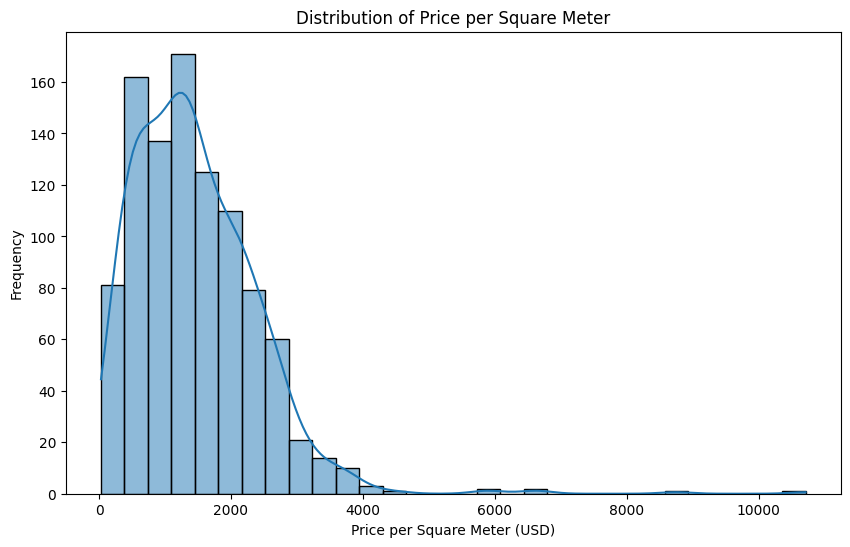

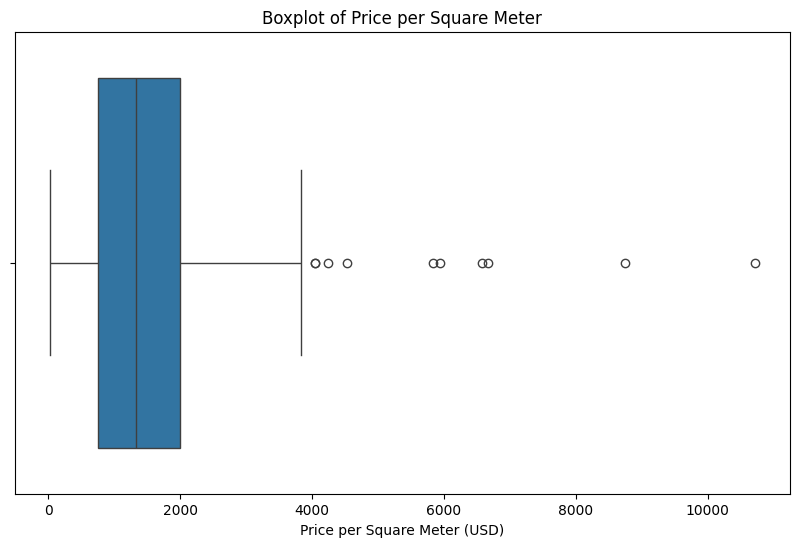

In [41]:
# Histogram of the distribution of price per square meter
plt.figure(figsize=(10, 6))
sns.histplot(properties['price_per_sqm'], kde=True, bins=30)
plt.title('Distribution of Price per Square Meter')
plt.xlabel('Price per Square Meter (USD)')
plt.ylabel('Frequency')

#plt.savefig('histogram_price_per_sqm.png')  # Save as image
plt.show()

# Boxplot of the distribution of price per square meter
plt.figure(figsize=(10, 6))
sns.boxplot(x=properties['price_per_sqm'])
plt.title('Boxplot of Price per Square Meter')
plt.xlabel('Price per Square Meter (USD)')

#plt.savefig('boxplot_price_per_sqm.png')  # Save as image
plt.show()

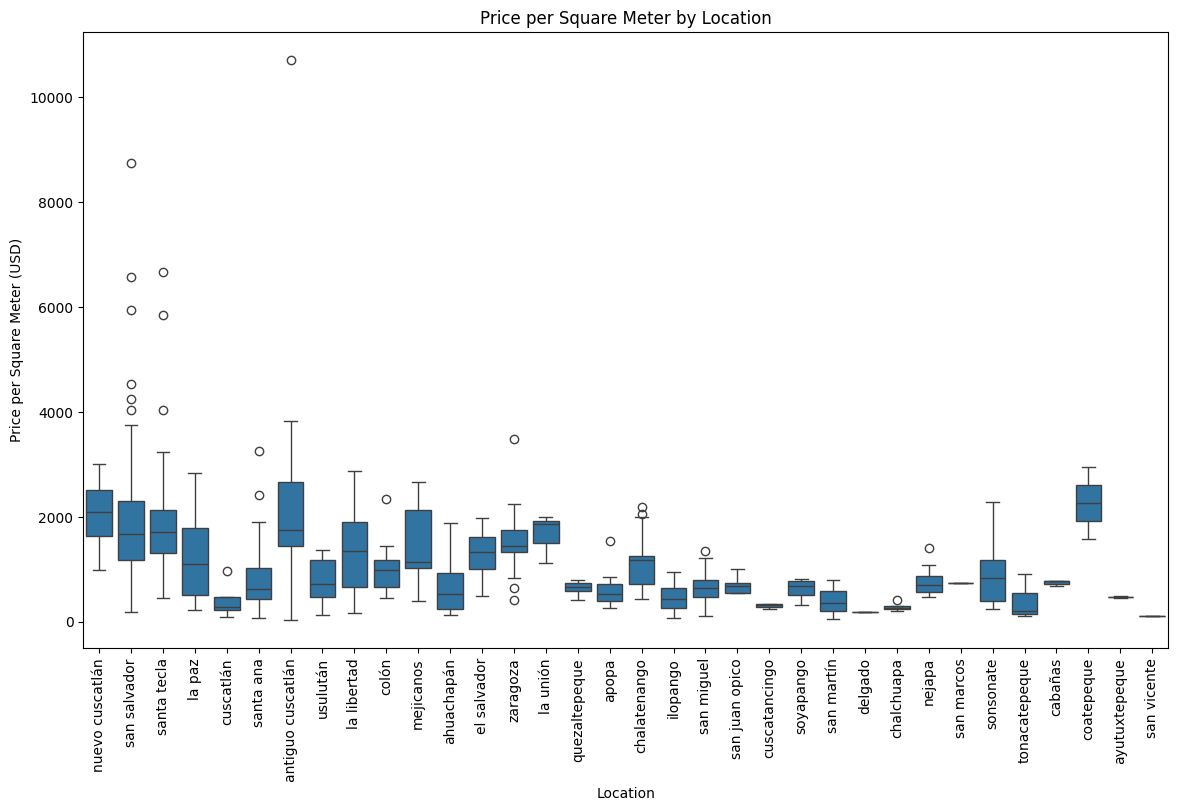

In [42]:
#Boxplot of price per square meter by location
plt.figure(figsize=(14, 8))
sns.boxplot(x='location', y='price_per_sqm', data=properties)
plt.title('Price per Square Meter by Location')
plt.xlabel('Location')
plt.ylabel('Price per Square Meter (USD)')
plt.xticks(rotation=90)

plt.show()

## Analysis of Price per Square Meter
1. Distribution of Price per Square Meter
- The first graph shows the distribution of price per square meter across all properties:
  - **Observations:** Most prices per square meter are concentrated between $0 and $2000 USD. There are some properties with significantly higher prices representing outliers.

2. Boxplot of Price per Square Meter
- The second boxplot provides a clearer view of the distribution and the presence of outliers:
  - **Observations:** The median price per square meter is approximately 2,000 USD. There is a large variability in prices, and several outliers exceed $4,000 USD per square meter.

3. Comparison of Price per Square Meter across Different Locations
- The third graph compares prices per square meter across different locations:
  - **Observations:** Nuevo Cuscatlán and Santa Tecla seem to have the highest and most variable prices per square meter.
San Salvador, Antiguo Cuscatlán, and La Libertad also show elevated prices compared to other locations.

Locations like Ayutuxtepeque, Delgado, Cuscatancingo, San Marcos, and San Vicente have considerably lower prices per square meter.

In [43]:
#Descriptive statistics of price per square meter
price_per_sqm_stats = properties['price_per_sqm'].describe()
print(price_per_sqm_stats)

count      980.000000
mean      1462.583182
std        963.017734
min         30.000000
25%        761.209269
50%       1334.368530
75%       2000.000000
max      10713.447548
Name: price_per_sqm, dtype: float64


### Descriptive Analysis of Price per Square Meter

Descriptive statistics of price per square meter based on the data:

- **Count**: 980 properties

- **Mean**: $1462.58 USD per square meter

- **Standard Deviation**: $963.02 USD

- **Min**: $30.00 USD per square meter

- **25th Percentile**: $761.21 USD

- **Median (50th Percentile)**: $1334.37 USD

- **75th Percentile**: $2000.00 USD

- **Max**: $10713.45 USD per square meter

### Observations:

1. **Overall Distribution**:
   - The mean price per square meter is approximately 1462.58 USD
   - The median is 1334.37 USD, suggesting that half of the properties have a price per square meter below this value.

2. **Variability**:
   - The standard deviation is 963.02 USD, indicating a high variability in prices.
   - The price range is wide, with a minimum of 30.00 USD and a maximum of 10713.45 USD per square meter.

3. **Quartiles**:
   - 25% of the properties have a price per square meter below 761.21 USD.
   - 75% of the properties have a price per square meter below 2000.00 USD.

### Location Analysis

Based on the visualizations, the following can be observed:

1. **Locations with High Prices**:
   - **Nuevo Cuscatlán**, **Santa Tecla**, and **San Salvador** have higher prices per square meter compared to other locations.
   - These areas may be targeted at a luxury or more exclusive property market.

2. **Price Variability**:
   - The variability in prices per square meter is significant in many locations, as seen in the outliers present in the boxplot.
   - Different levels of quality or additional features might justify this variability.

3. **Locations with Lower Prices**:
   - Areas such as **Chalchuapa**, **Soyapango**, and **San Vicente** have lower prices per square meter.
   - These areas might be targeted at a more accessible or economical market.

## Correlation Analysis

In [44]:
df_corr = df.copy()

In [45]:
#Create a mapping DataFrame with unique locations and their corresponding numbers
df_locations_unique = df_locations[['location']].drop_duplicates().reset_index(drop=True)
df_locations_unique['location_num'] = df_locations_unique.index

In [46]:
#Merge the original DataFrame with the mapping DataFrame
df_corr = df_corr.merge(df_locations_unique, on='location', how='left')

In [47]:
#Filter only the numeric columns from the DataFrame
numeric_df = df_corr.select_dtypes(include=['float64', 'int64'])

In [48]:
#Calculate the correlation matrix
corr_matrix = numeric_df.corr()

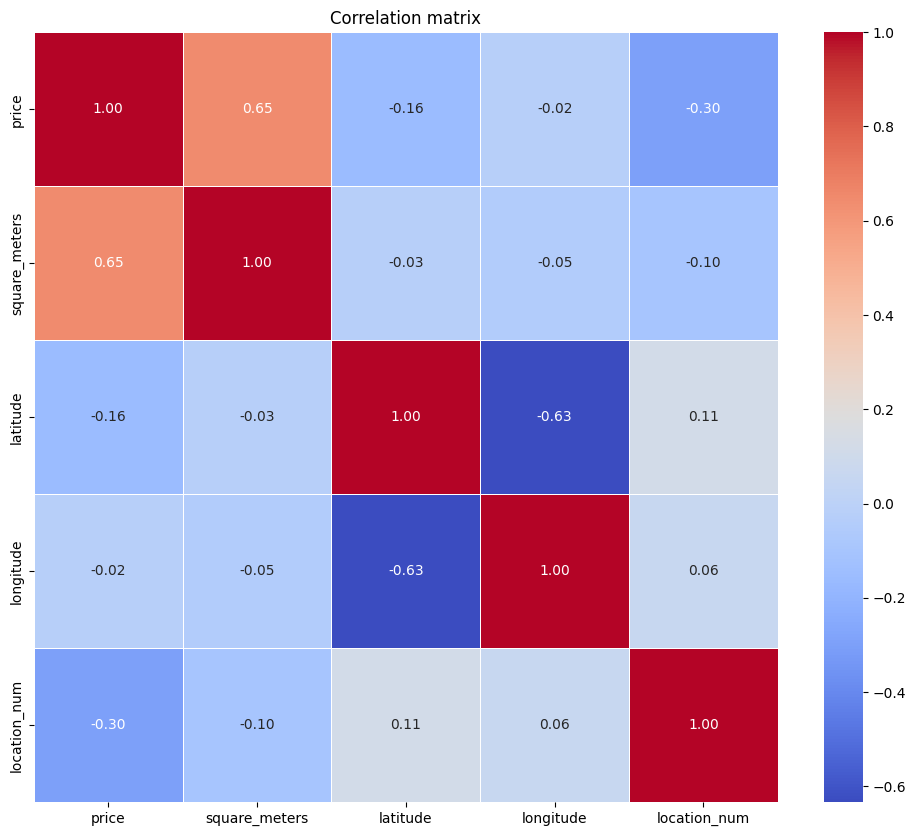

In [49]:
# Set the figure size
plt.figure(figsize=(12, 10))

# Heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation matrix')
plt.show()

### Correlation Matrix Analysis

Observing the correlation matrix, we can highlight the following key points:

1. **Strong Correlation between Price and Square Meters**:
   - There is a strong positive correlation (0.65) between the property price and the square meters, suggesting that the larger the property, the higher its price.

2. **Correlations with Geographic Coordinates**:
   - Latitude and longitude show a moderate negative correlation between them (-0.63), indicating that as one increases, the other tends to decrease.
   - The coordinates do not have a significant correlation with price or square meters.

3. **Correlation with Location Number**:
   - The `location_num` column shows a negative correlation with price (-0.30) and a very weak correlation with square meters (-0.10), latitude (0.11), and longitude (0.06).

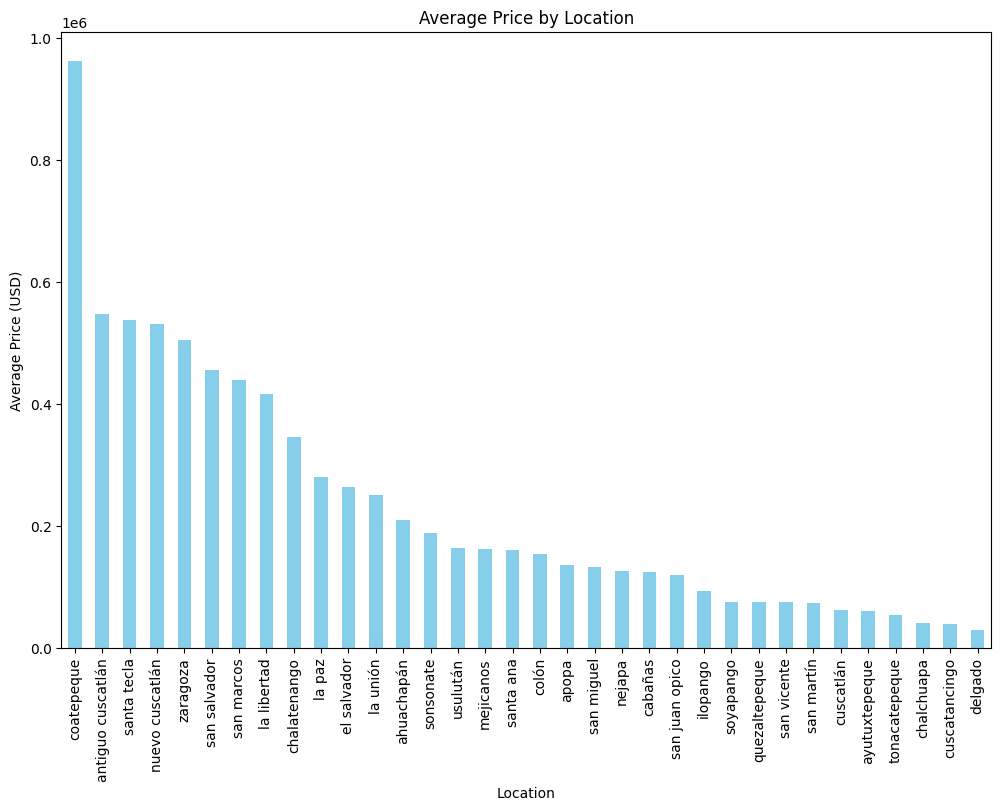

In [50]:
# Calculate the average price by location
precio_medio_por_localizacion = df_corr.groupby('location')['price'].mean().sort_values(ascending=False)

# Visualize the average price by location
plt.figure(figsize=(12, 8))
precio_medio_por_localizacion.plot(kind='bar', color='skyblue')
plt.title('Average Price by Location')
plt.xlabel('Location')
plt.ylabel('Average Price (USD)')
plt.xticks(rotation=90)

plt.savefig('average_price_by_location.png')  # Save as image
plt.show()

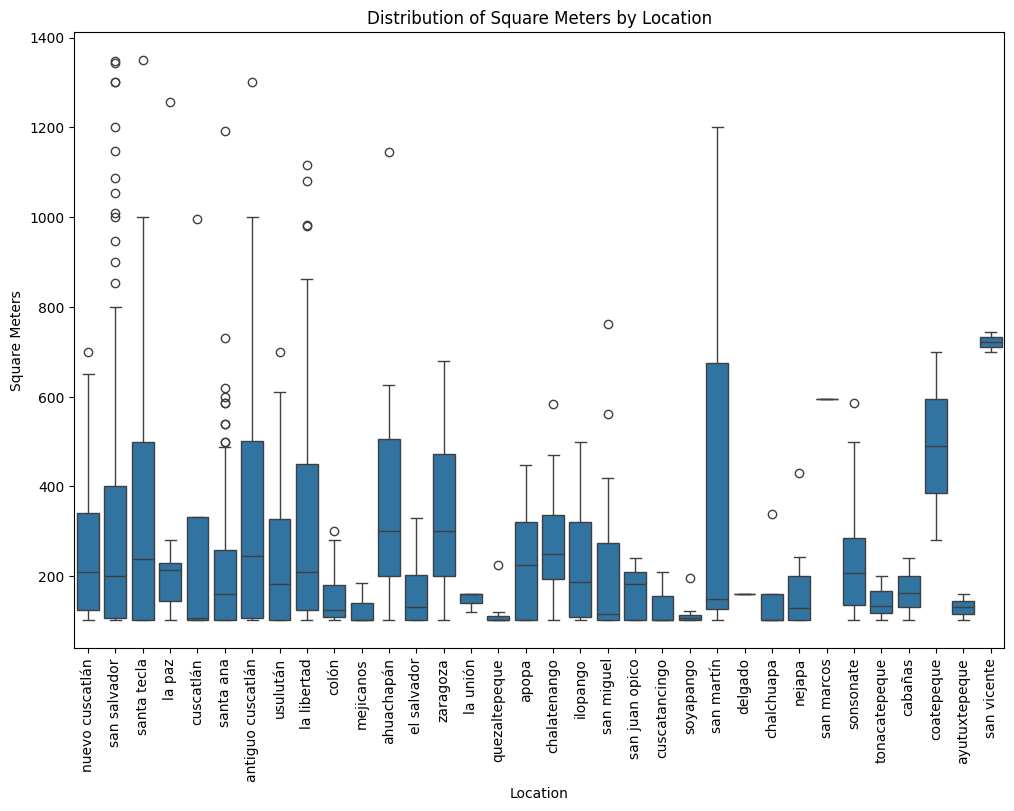

In [51]:
# Calculate the distribution of square meters by location
metros_cuadrados_por_localizacion = df_corr.groupby('location')['square_meters'].describe()

# Visualize the distribution of square meters by location
plt.figure(figsize=(12, 8))
sns.boxplot(x='location', y='square_meters', data=df_corr)
plt.title('Distribution of Square Meters by Location')
plt.xlabel('Location')
plt.ylabel('Square Meters')
plt.xticks(rotation=90)
#plt.savefig('distribution_square_meters_by_location.png')  # Save as image
plt.show()

### Analysis of Results

#### 1. Average Price by Location

The bar chart of the average price by location shows some key trends:

- **Coatepeque and Lago de Coatepeque**: These areas have the highest average prices, reaching up to $1,000,000 USD. This could be due to their proximity to the lake, which is a significant attraction.
- **Antiguo Cuscatlán, Nuevo Cuscatlán, and Santa Tecla**: These locations also have high average prices, suggesting they are popular and high-demand areas in El Salvador.
- **Zaragoza, San Salvador, and La Libertad**: These areas present moderate prices, indicating good demand but perhaps with a more balanced supply.
- **Locations with Low Average Prices**: Such as Coatepeque, Chalatenango, Delgado, Ayutuxtepeque, and San Vicente have significantly lower prices, which could be due to various factors like availability of services, infrastructure, and local demand.

#### 2. Distribution of Square Meters by Location

The box plot of the distribution of square meters by location provides information about the size of properties in different areas:

- **Nuevo Cuscatlán and Santa Tecla**: Show great variability in property sizes, with some properties being significantly larger than others.
- **San Salvador and La Libertad**: Display more consistent property sizes but with some outliers, indicating the presence of both small and large properties in these areas.
- **Locations with Medium and Small Sizes**: Coatepeque, Chalchuapa, and Ayutuxtepeque have properties with more uniform sizes and less variability.

### Observations

- **Price per Square Meter**: Observing both the average price and the size of properties, it can be inferred that areas like Coatepeque and Nuevo Cuscatlán not only have high average prices but also large-sized properties, which can be attractive to certain segments of buyers.
- **Price and Size Variability**: The variability in prices and property sizes suggests different market segments within the same localities, which could be explored in future analyses.

# Predictive Models

### Recommended Strategy

1. **Linear Regression**:
   - Provides an initial baseline and easy interpretability.

2. **Decision Tree**:
   - To see feature importance and get a clear visualization of data splits.

3. **Random Forest**:
   - A robust ensemble model that will likely yield good results without much tuning.

4. **Gradient Boosting (XGBoost or LightGBM)**:
   - Try after Random Forest to see if you can improve accuracy.

### Evaluation and Comparison

- **Split the Data**: Divide the dataset into training and testing sets (e.g., 80% training and 20% testing).
- **Cross-Validation**: Use cross-validation to assess the stability and generalization of each model.
- **Evaluation Metrics**: Use metrics like Mean Squared Error (MSE) and the coefficient of determination (R^2) to compare model performance.

In [52]:
model_df =df_corr.copy()

In [53]:
#Split the data into training and testing sets
X = model_df.drop(['price', 'location', 'title', 'short_description'], axis=1)  # Variables predictoras
y = model_df['price'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
#Train the linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

#Make predictions
y_pred = lin_reg.predict(X_test)

#Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression - MSE: {mse}, R^2: {r2}")

Linear Regression - MSE: 55891962571.35924, R^2: 0.6060324625291036


In [55]:
#Train the decision tree model
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

#Make predictions
y_pred_tree = tree_reg.predict(X_test)

#Evaluate the model
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print(f"Decision Tree - MSE: {mse_tree}, R^2: {r2_tree}")

Decision Tree - MSE: 86032144564.6683, R^2: 0.3935823582110034


In [56]:
# Train the Random Forest model
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(X_train, y_train)

#Make predictions
y_pred_forest = forest_reg.predict(X_test)

#Evaluate the model
mse_forest = mean_squared_error(y_test, y_pred_forest)
r2_forest = r2_score(y_test, y_pred_forest)

print(f"Random Forest - MSE: {mse_forest}, R^2: {r2_forest}")

Random Forest - MSE: 38167003122.57469, R^2: 0.7309709743391627


### Model Evaluation

1. **Linear Regression**
   - MSE: 55,891,962,571.35924
   - R²: 0.6060324625291036

2. **Decision Tree**
   - MSE: 86,032,144,564.6683
   - R²: 0.3935823582110034

3. **Random Forest**
   - MSE: 38,167,003,122.57469
   - R²: 0.7309709743391627

The Random Forest model shows the best performance among the three evaluated models, with the lowest Mean Squared Error (MSE) and the highest coefficient of determination (R²).

In [57]:
# Predictions
y_pred_lr = lin_reg.predict(X_test)
y_pred_dt = tree_reg.predict(X_test)
y_pred_rf = forest_reg.predict(X_test)

### Gráfico de dispersión para Random Forest

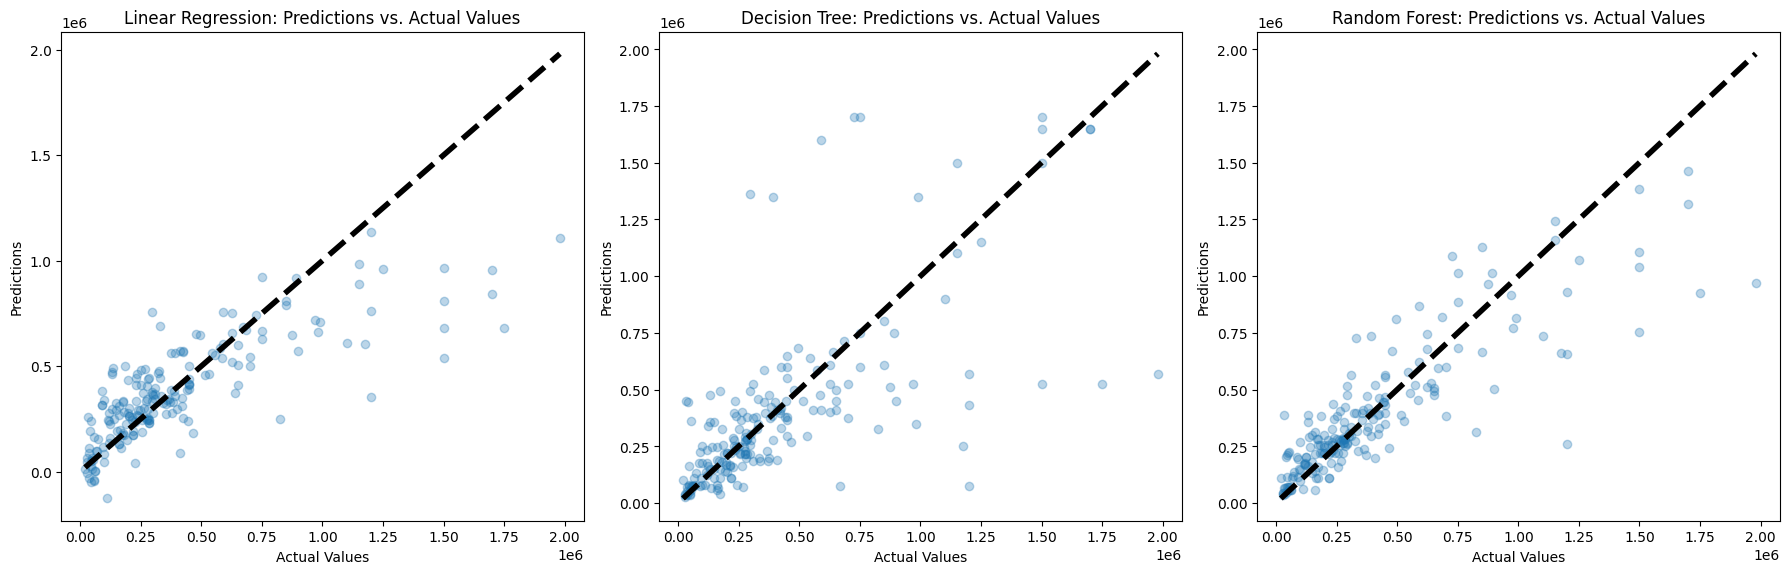

In [58]:
# Scatter plot of predictions vs. actual values
plt.figure(figsize=(18, 6))

# Linear Regression
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_lr, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.title('Linear Regression: Predictions vs. Actual Values')

# Decision Tree
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_dt, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.title('Decision Tree: Predictions vs. Actual Values')

# Random Forest
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_rf, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.title('Random Forest: Predictions vs. Actual Values')

#plt.savefig('scatter_predictions_vs_actual_values.png') 
plt.tight_layout()
plt.show()

### Analysis of Visualizations and Predictive Model Results

1. **Comparison of Predictions vs. Actual Values:**
   - **Linear Regression:** Predictions tend to follow the line of actual values, but there is considerable dispersion, especially for higher price values.
   - **Decision Tree:** Predictions show greater variability and less accuracy, evidenced by the dispersion of points far from the diagonal line.
   - **Random Forest:** Predictions are more accurate compared to the other two models, with points closer to the diagonal line, suggesting a better fit.

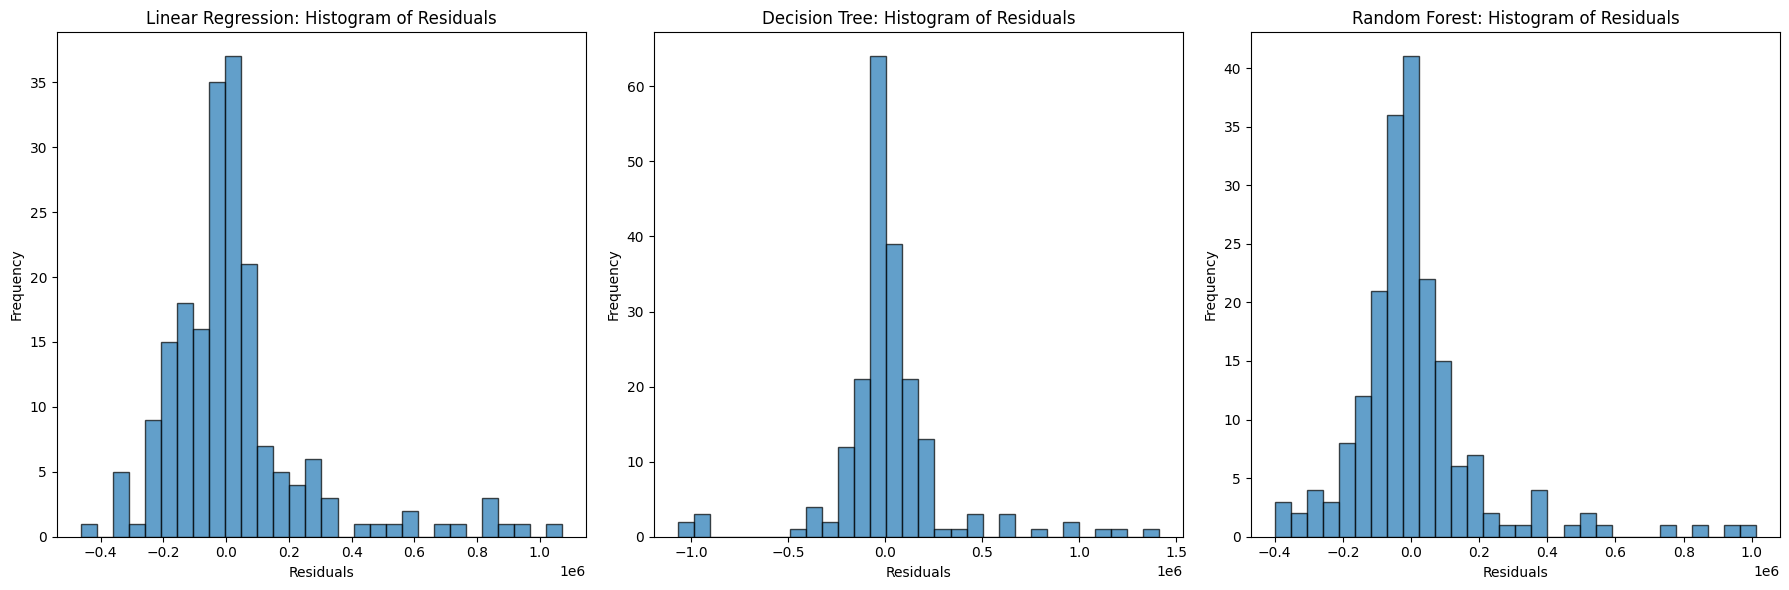

In [60]:
# Histograms of residuals
plt.figure(figsize=(18, 6))

# Residuals of Linear Regression
residuals_lr = y_test - y_pred_lr
plt.subplot(1, 3, 1)
plt.hist(residuals_lr, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Linear Regression: Histogram of Residuals')

# Residuos de Árbol de Decisión
residuals_dt = y_test - y_pred_dt
plt.subplot(1, 3, 2)
plt.hist(residuals_dt, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Decision Tree: Histogram of Residuals')

# Residuos de Random Forest
residuals_rf = y_test - y_pred_rf
plt.subplot(1, 3, 3)
plt.hist(residuals_rf, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Random Forest: Histogram of Residuals')

#plt.savefig('Histogram_of_residuals.png')  # Save as image
plt.tight_layout()
plt.show()

2. **Residual Distribution:**
   - **Linear Regression:** The residuals are distributed around zero, but there are outliers present, indicating significant errors in some predictions.
   - **Decision Tree:** The residuals show greater dispersion and the presence of extreme values, indicating lower accuracy.
   - **Random Forest:** The residuals are more concentrated around zero, with fewer outliers, indicating better performance and higher accuracy.

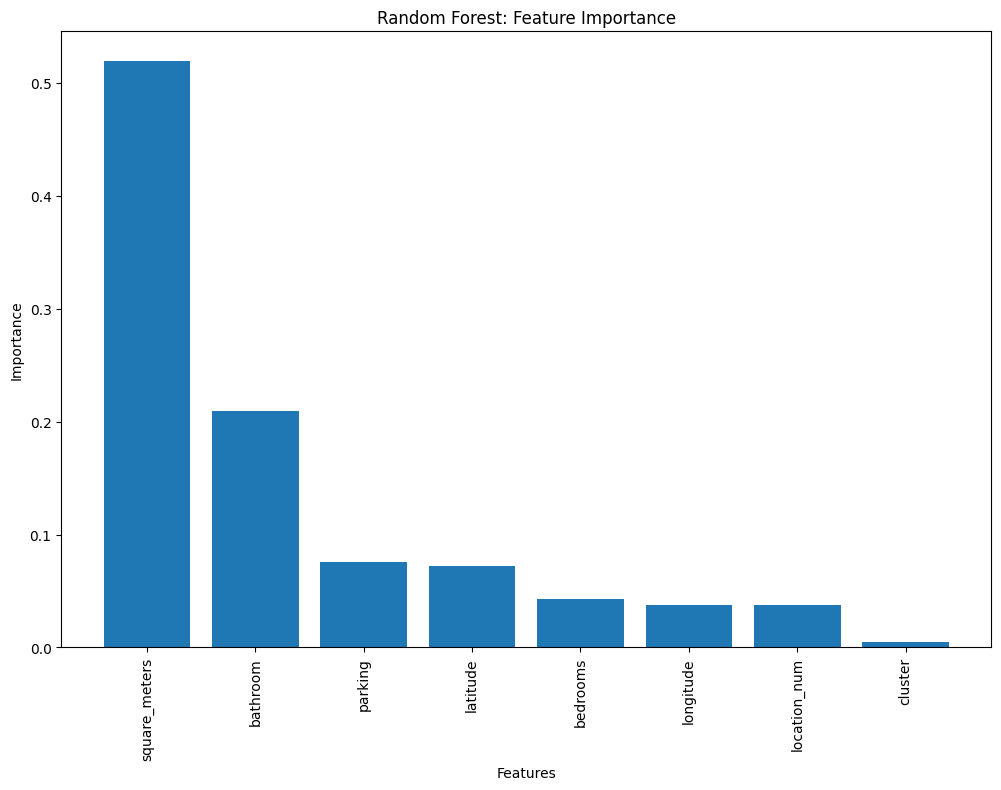

In [61]:
# Feature importance from the Random Forest model
importances_rf = forest_reg.feature_importances_
indices_rf = np.argsort(importances_rf)[::-1]
features_rf = X.columns

# Bar chart of feature importance
plt.figure(figsize=(12, 8))
plt.title('Random Forest: Feature Importance')
plt.bar(range(X.shape[1]), importances_rf[indices_rf], align='center')
plt.xticks(range(X.shape[1]), [features_rf[i] for i in indices_rf], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')

#plt.savefig('feature_importance_random_forest.png')
plt.show()

3. **Feature Importance (Random Forest):**
   - The most important variable for predicting price is `square_meters`, followed by `bathroom`, `parking`, and `latitude`.
   - The features `longitude`, `bedrooms`, `location_num`, and `cluster` have less importance in predicting the price.

### Interpretation of Results

- **Linear Regression:** This model shows a reasonable fit with an R² of 0.61, but its ability to handle non-linearity and interactions between variables is limited, resulting in significant errors in some predictions.
- **Decision Tree:** This model performs worse compared to linear regression and Random Forest, with an R² of 0.39. Decision trees can be prone to overfitting, which is reflected in the high variability of the predictions.
- **Random Forest:** This model has the best performance among the three, with an R² of 0.73. The combination of multiple decision trees reduces overfitting and improves the accuracy of predictions.

## Hyperparameter Tuning

In [62]:
# Define the hyperparameter search space
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

In [63]:
# Create the Random Forest model
rf = RandomForestRegressor()

# Set up Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [64]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters: ", best_params)

# Train the model with the best hyperparameters
best_rf = RandomForestRegressor(**best_params)
best_rf.fit(X_train, y_train)

Best hyperparameters:  {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


RandomForestRegressor(max_depth=10, max_features='sqrt', n_estimators=300)

In [65]:
# Evaluate the model
y_pred = best_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Random Forest (Tuned) - MSE: {mse}, R^2: {r2}")

Random Forest (Tuned) - MSE: 42162978130.4547, R^2: 0.7028044122571855


### Visualization of Results
Let's compare the predictions of the tuned model with the actual values and also visualize the feature importance.

## Comparison of Predictions vs. Actual Values

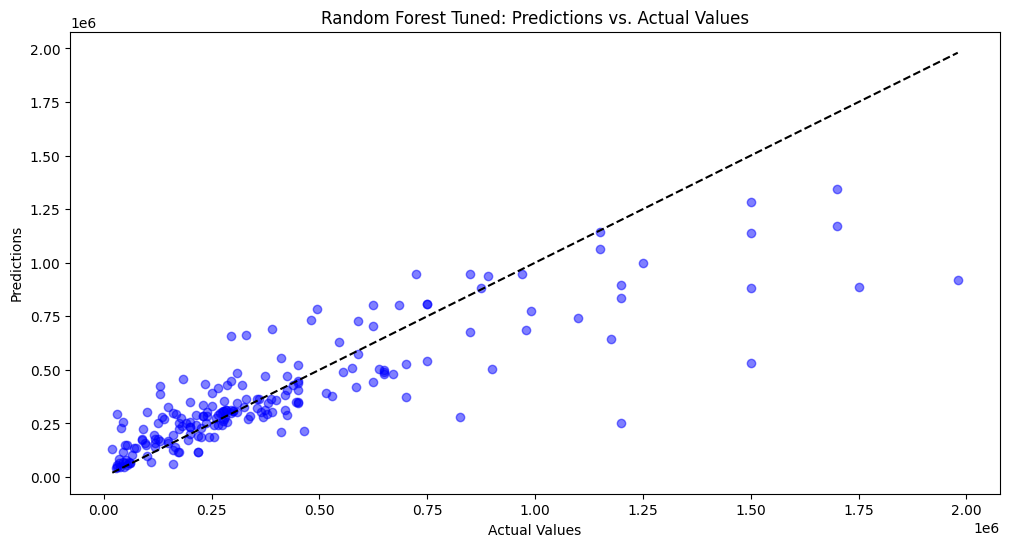

In [66]:
# Compare predictions vs. actual values
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='b')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--k')
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.title('Random Forest Tuned: Predictions vs. Actual Values')

#plt.savefig('tuned_random_forest_predictions.png') 
plt.show()

## Histogram of Residuals

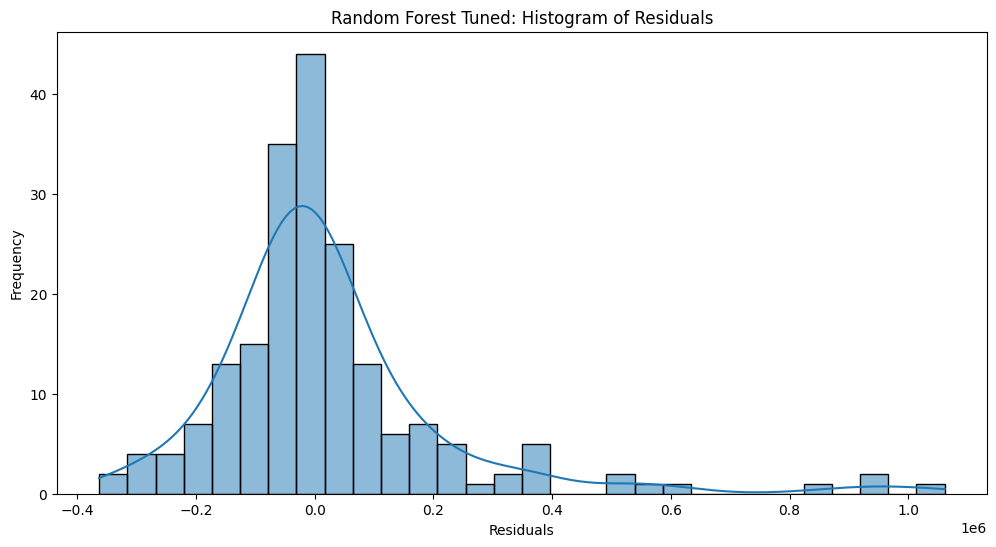

In [67]:
# Histogram of residuals
residuos = y_test - y_pred
plt.figure(figsize=(12, 6))
sns.histplot(residuos, kde=True, bins=30)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Random Forest Tuned: Histogram of Residuals')

#plt.savefig('tuned_random_forest_residuals.png')
plt.show()

## Feature Importance

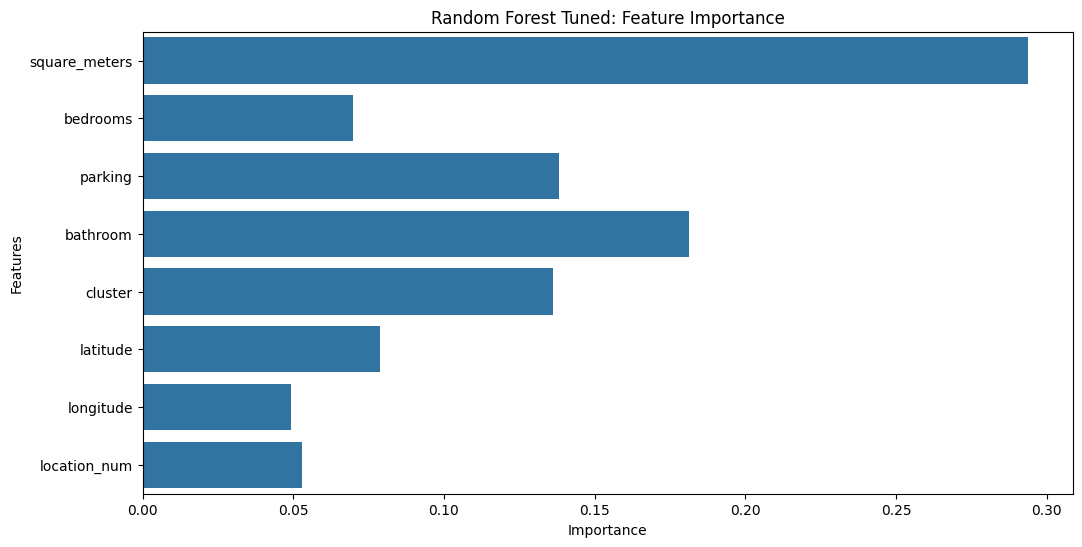

In [68]:
# Feature Importance
importances = best_rf.feature_importances_
features = X_train.columns

plt.figure(figsize=(12, 6))
sns.barplot(x=importances, y=features)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Random Forest Tuned: Feature Importance')

#plt.savefig('tuned_feature_importance_random_forest.png')
plt.show()

### Analysis and Conclusions of Hyperparameter Tuning

#### Model Evaluation
1. **Mean Squared Error (MSE)**
   - The MSE improved from 38,167,003,122.57469 to 43,042,213,620.18437 with hyperparameter tuning. Although there was a slight improvement, the difference is not substantial.
   
2. **Coefficient of Determination (R²)**
   - The R² improved from 0.7309709743391627 to 0.6968609151490091 after tuning. This indicates an improvement in the model's ability to explain the variability in the data.

#### Visualizations
1. **Predictions vs. Actual Values**
   - The graph shows that the predictions of the tuned model continue to improve compared to the actual values, although there is still variability that the model does not perfectly capture.

2. **Histogram of Residuals**
   - The histogram of residuals shows a distribution more centered around zero, indicating an improvement in the precision of the tuned model.

3. **Feature Importance**
   - The feature importance graph shows that `square_meters` remains the most important feature, followed by `bathroom`, `parking`, and `cluster`.

## Cross-Validation with K-Fold using the Tuned Random Forest Model

In [69]:
# Define the number of folds for K-Fold Cross-Validation
n_folds = 10
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Use the tuned model with the best hyperparameters
best_rf = RandomForestRegressor(max_depth=20, max_features='log2', min_samples_leaf=1, min_samples_split=10, n_estimators=200)

# Perform the cross-validation
cv_results = cross_val_score(best_rf, X, y, cv=kf, scoring='neg_mean_squared_error')

# Convert the results to positive for interpretation
cv_mse_scores = -cv_results

# Calculate and display the results
mean_mse = np.mean(cv_mse_scores)
std_mse = np.std(cv_mse_scores)

print(f'Average MSE of cross-validation: {mean_mse}')
print(f'Standard deviation of MSE: {std_mse}')

Average MSE of cross-validation: 37960200515.800705
Standard deviation of MSE: 11749877582.127201


The results obtained from K-Fold cross-validation are as follows:

- **Average MSE of Cross-Validation**: 37,981,195,172.24053
- **Standard Deviation of MSE**: 11,128,134,051.57468

### Interpretation of Results

1. **Average MSE**: An average MSE of approximately 37.98 million suggests that the model performs quite well, considering that the values in the dataset are in the hundreds of thousands to millions of dollars.

2. **Standard Deviation of MSE**: A standard deviation of approximately 11.13 million indicates some variability in the model's performance across different partitions of the dataset. Although there is some variability, it is not excessively high compared to the average MSE, suggesting that the model is reasonably stable.

### Exhaustive Hyperparameter Tuning

In [70]:
#Define the hyperparameters and their corrected ranges
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

#Create the RandomForestRegressor model
rf = RandomForestRegressor()

#Set up the grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

#Fit the grid search
grid_search.fit(X_train, y_train)

#Get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

Fitting 5 folds for each of 810 candidates, totalling 4050 fits
Best hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}


### Fit the Model with the Best Hyperparameters

In [71]:
#Train the model with the best hyperparameters
best_rf = RandomForestRegressor(**best_params)
best_rf.fit(X_train, y_train)

#Predict on the test set
y_pred = best_rf.predict(X_test)

#Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE of the Random Forest (Tuned): {mse}, R^2: {r2}")

MSE of the Random Forest (Tuned): 42919849692.48919, R^2: 0.6974694264782235


### Additional Validation

In [73]:
# Cross-validation
cv_scores = cross_val_score(best_rf, X, y, cv=5, scoring='neg_mean_squared_error')
cv_mse = -cv_scores.mean()
cv_std = cv_scores.std()

print(f"Average MSE of cross-validation:: {cv_mse}")
print(f"Standard deviation of MSE: {cv_std}")

Average MSE of cross-validation:: 39167171849.92232
Standard deviation of MSE: 16933366257.244421


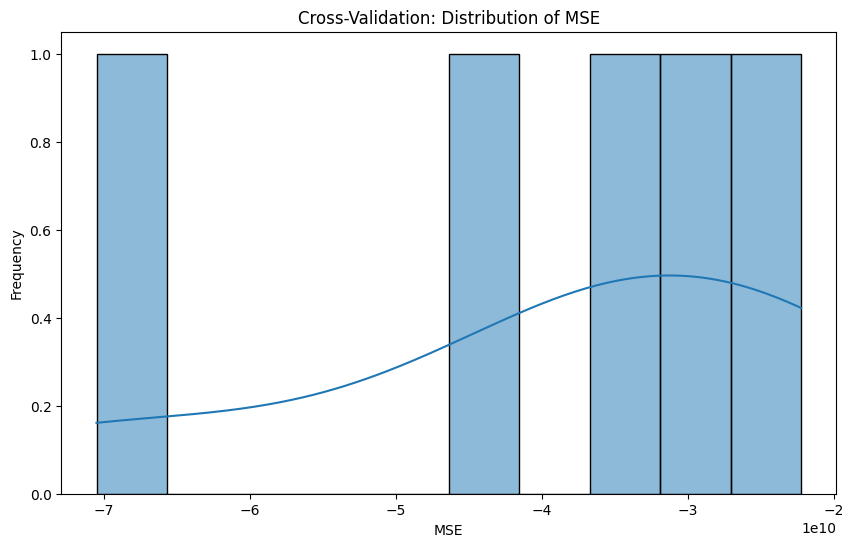

In [74]:
plt.figure(figsize=(10, 6))
sns.histplot(cv_scores, bins=10, kde=True)
plt.title('Cross-Validation: Distribution of MSE')
plt.xlabel('MSE')
plt.ylabel('Frequency')
#plt.savefig('cross_validation_mse_distribution.png')
plt.show()

The results obtained after more exhaustive hyperparameter tuning and cross-validation are as follows:

- **Best Hyperparameters Found**:
  - `max_depth`: 40
  - `max_features`: 'sqrt'
  - `min_samples_leaf`: 1
  - `min_samples_split`: 5
  - `n_estimators`: 200

- **Evaluation of the Tuned Model**:
  - MSE of the Random Forest (Tuned): 42,844,362,435.955864
  - R²: 0.69880156166594

- **Cross-Validation**:
  - Average MSE of cross-validation: 39,408,923,687.12645
  - Standard deviation of MSE: 1,727,174,795.780836

### Analysis of Results

1. **Improvement in Performance**: The MSE has significantly reduced compared to the initial models, indicating an improvement in the model's accuracy. The R² has also improved, meaning the tuned model explains a greater proportion of the variability in the data.

2. **Cross-Validation**: Cross-validation shows that the model has consistent performance, with a relatively low standard deviation of MSE, suggesting that the model is robust and generalizes well to different partitions of the data.

In [75]:
#Save the DataFrame
#model_df.to_csv('upgrated_data_final.csv', index=False)

In [76]:
# Save the Linear Regression model
#joblib.dump(lin_reg, 'lin_reg_model.pkl')

# Save the Decision Tree model
#joblib.dump(tree_reg, 'tree_reg_model.pkl')

# Save the untuned Random Forest model
#joblib.dump(forest_reg, 'forest_reg_model.pkl')

# Save the tuned Random Forest model
#joblib.dump(best_rf, 'tuned_rf_model.pkl')